In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder\
                    .appName("Analyzing London Crime Data")\
                    .getOrCreate()

In [7]:
data = spark.read\
            .format("csv")\
            .option("header","true")\
            .load("../datasets/london_crime_by_lsoa.csv")

In [8]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [9]:
data.count()

13490604

In [10]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [11]:
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [12]:
data = data.drop("lsoa_code")
data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [13]:
total_boroughs = data.select('borough')\
                        .distinct()
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [14]:
total_boroughs.count()

33

In [15]:
hackney_data = data.filter(data["borough"] == "Hackney")
hackney_data.show(5)

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
+-------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [16]:
data_2015_2016 = data.filter(data["year"].isin(["2015","2016"]))
data_2015_2016.show(5)

+---------+--------------------+--------------------+-----+----+-----+
|  borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+-----+----+-----+
|  Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|  Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|   Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
+---------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [17]:
data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|              Sutton|Violence Against ...|        Wounding/GBH|    0|2016|    7|
|             Hackney|             Robbery|   Business Property|    0|2016|    7|
|Kingston upon Thames|  Theft and Handling|Motor Vehicle Int...|    0|2016|    5|
|               Brent|               Drugs| Possession Of Drugs|    0|2015|   11|
|         Westminster|     Criminal Damage|Criminal Damage T...|    0|2015|   12|
|              Ealing|Other Notifiable ...|    Other Notifiable|    0|2016|   12|
|             Enfield|  Theft and Handling|Theft From Motor ...|    2|2015|   10|
|            Havering|Violence Against ...|    Offensive Weapon|    0|2016|   11|
|          Wands

In [18]:
data_2014_onwards = data.filter(data["year"] >= 2014)
data_2014_onwards.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|             Croydon|  Theft and Handling|Motor Vehicle Int...|    0|2016|    3|
|           Islington|     Sexual Offences|        Other Sexual|    0|2016|   10|
|Kensington and Ch...|             Robbery|   Personal Property|    1|2015|    7|
|          Hillingdon|Violence Against ...|    Offensive Weapon|    0|2014|    5|
|             Lambeth|               Drugs|    Drug Trafficking|    0|2015|    9|
|             Lambeth|     Criminal Damage|Criminal Damage T...|    0|2016|    7|
|              Newham|Violence Against ...|          Harassment|    0|2014|    1|
|             Lambeth|     Sexual Offences|                Rape|    0|2014|    3|
|         Westmi

In [19]:
borough_crime_count = data.groupBy('borough')\
                          .count()
borough_crime_count.show(5)

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
+--------------------+------+
only showing top 5 rows



In [20]:
borough_conviction_sum = data.groupBy('borough')\
                          .agg({'value':'sum'})
borough_conviction_sum.show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
+--------------------+----------+
only showing top 5 rows



In [21]:
borough_conviction_sum = data.groupBy('borough')\
                            .agg({'value':'sum'})\
                            .withColumnRenamed("sum(value)","convictions")
borough_conviction_sum.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
+--------------------+-----------+
only showing top 5 rows



In [22]:
total_borough_convictions = borough_conviction_sum.agg({'convictions':'sum'})\
                            .withColumnRenamed("sum(convictions)","total_convictions")
total_borough_convictions.show()

+-----------------+
|total_convictions|
+-----------------+
|        6447758.0|
+-----------------+



In [23]:
total_convictions = total_borough_convictions.collect()[0][0]
total_convictions

6447758.0

In [24]:
import pyspark.sql.functions as func

In [25]:
borough_percentage_contributions = borough_conviction_sum.withColumn(
    "% contribution",
    func.round(borough_conviction_sum.convictions/total_convictions * 100,2)
)
borough_percentage_contributions.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [26]:
borough_percentage_contributions.orderBy(borough_percentage_contributions[2].desc())\
                                                .show(10)

+-------------+-----------+--------------+
|      borough|convictions|% contribution|
+-------------+-----------+--------------+
|  Westminster|   455028.0|          7.06|
|      Lambeth|   292178.0|          4.53|
|    Southwark|   278809.0|          4.32|
|       Camden|   275147.0|          4.27|
|       Newham|   262024.0|          4.06|
|      Croydon|   260294.0|          4.04|
|       Ealing|   251562.0|           3.9|
|    Islington|   230286.0|          3.57|
|Tower Hamlets|   228613.0|          3.55|
|        Brent|   227551.0|          3.53|
+-------------+-----------+--------------+
only showing top 10 rows



In [27]:
conviction_monthly = data.filter(data["year"] == "2014")\
                        .groupBy("month")\
                        .agg({"value":"sum"})\
                        .withColumnRenamed("sum(value)","convictions")
conviction_monthly.show(5)

+-----+-----------+
|month|convictions|
+-----+-----------+
|    7|    58564.0|
|   11|    59704.0|
|    3|    57669.0|
|    8|    55641.0|
|    5|    56327.0|
+-----+-----------+
only showing top 5 rows



In [28]:
total_conviction_monthly_sum = conviction_monthly.agg({"convictions" : "sum"}).collect()[0][0]
total_conviction_monthly_sum

680183.0

In [29]:
total_conviction_monthly = conviction_monthly.withColumn(
                            "percent",
                            func.round(conviction_monthly.convictions/total_conviction_monthly_sum * 100 , 2))
total_conviction_monthly.columns

['month', 'convictions', 'percent']

In [30]:
total_conviction_monthly.orderBy(total_conviction_monthly[2].desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   10|    60537.0|    8.9|
|   11|    59704.0|   8.78|
|    7|    58564.0|   8.61|
|    3|    57669.0|   8.48|
|   12|    57565.0|   8.46|
|    6|    57039.0|   8.39|
|    9|    56933.0|   8.37|
|    5|    56327.0|   8.28|
|    8|    55641.0|   8.18|
|    1|    55515.0|   8.16|
|    4|    53467.0|   7.86|
|    2|    51222.0|   7.53|
+-----+-----------+-------+



In [31]:
data.show(10)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|    Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|    Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|  Hounslow|             Robbery|   Personal Property|    0|2013|    4|
|    Newham|     Criminal Damage|Criminal Damage T...|    0|2013|    9|
|    Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
+----------+--------------------+--------------------+-----+----

In [32]:
crimes_category = data.groupBy("major_category")\
                    .agg({"value" : "sum"})\
                    .withColumnRenamed("sum(value)","convictions")
crimes_category.show(10)

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|  Theft and Handling|  2661861.0|
|    Fraud or Forgery|     5325.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|Other Notifiable ...|   106349.0|
|     Sexual Offences|     1273.0|
|     Criminal Damage|   630938.0|
+--------------------+-----------+



In [33]:
crimes_category.orderBy(crimes_category[1].desc()).show(10)

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [34]:
year_df = data.select("year")

In [35]:
year_df.distinct().show()

+----+
|year|
+----+
|2016|
|2012|
|2014|
|2013|
|2009|
|2011|
|2008|
|2015|
|2010|
+----+



In [36]:
year_df.agg({"year" : "min"}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [37]:
year_df.agg({"year" : "max"}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [38]:
year_df.describe().show()

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|          13490604|
|   mean|            2012.0|
| stddev|2.5819889931674136|
|    min|              2008|
|    max|              2016|
+-------+------------------+



In [39]:
data.crosstab("borough","major_category")\
        .select("borough_major_category","Burglary","Drugs","Fraud or Forgery","Robbery")\
        .show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

In [41]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [50]:
def describe_year(year):
    yearly_details = data.filter(data["year"] == year)\
                    .groupBy("borough")\
                    .agg({"value" : "sum"})\
                    .withColumnRenamed("sum(value)","convictions")
    #yearly_details.show()
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    conviction_list = [x[1] for x in yearly_details.toLocalIterator()]
    plt.figure(figsize=(33,10))
    plt.bar(borough_list,conviction_list)
    plt.title("Crime for the year "+ year ,fontsize=30)
    plt.xlabel("Boroughs",fontsize=30)
    plt.ylabel("Convictions",fontsize=30)
    
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()
    

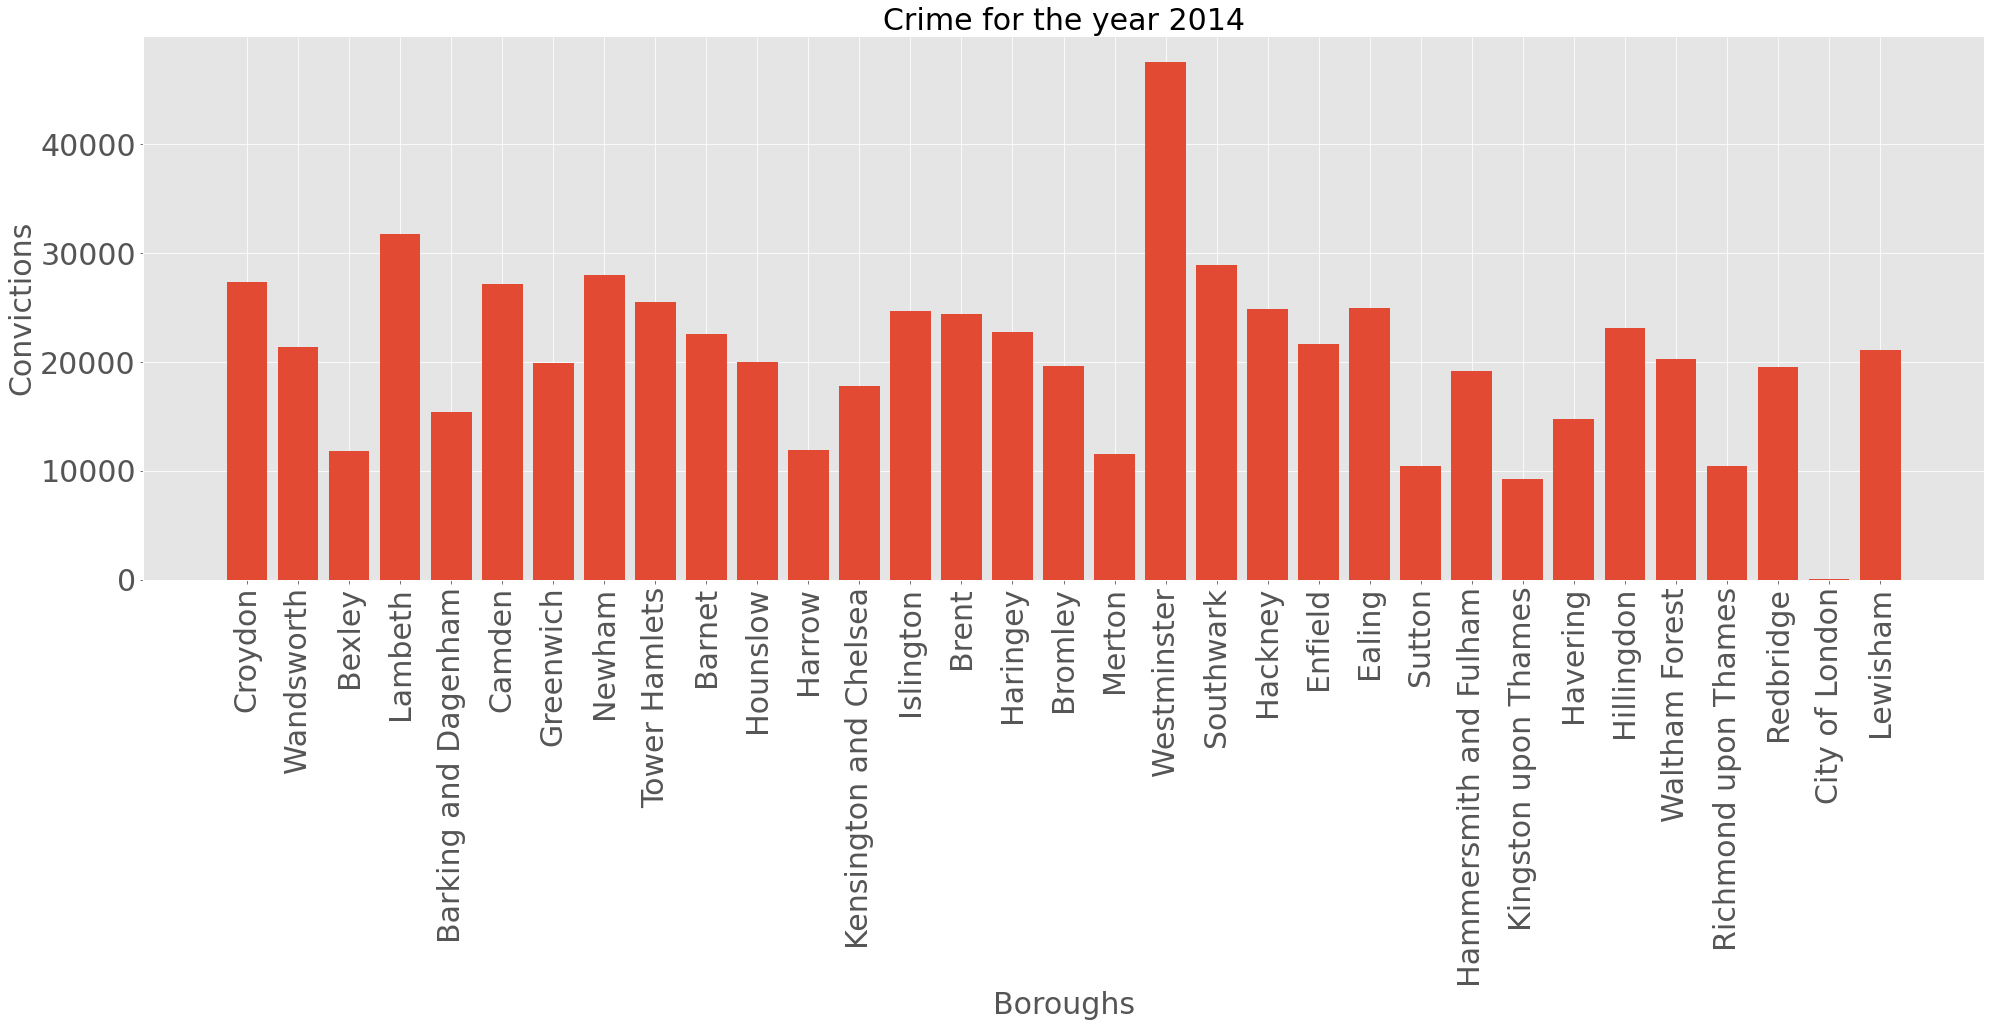

In [52]:
describe_year("2014")